In [607]:
#Import all relevant libraries
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

%matplotlib inline

## Load the data
The read_csv() function can now be used to load the dataset into pandas and mount it to a disk. This allows Colab to access the drive and transforms the CSV file into a Pandas dataframe.

In [608]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## View the dataframe
The shape, head, tail, and columns methods of the panadas functions allow us to quickly gauge the size of our dataset. These techniques help us gain a deeper understanding of the data.


df.head(2)

In [609]:
df.shape

(10754, 22)

In [610]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [611]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Profiling Data
The practice of thoroughly analyzing the data in an existing dataset and gathering statistics and information about it is known as data profiling.

# Preprocess The Data

In [612]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [614]:
df["team"].value_counts(ascending=False)

,count
team,
Daejeon Hana Citizen,46
Jeonbuk Hyundai Motors,46
FC Seoul,45
Gangwon FC,43
Daegu FC,42
...,...
FC Barcelona,22
Atlético de Madrid,22
CA Osasuna,22


In [615]:
df["winger"].unique()

array([0, 1])

In [616]:
df["position_encoded"].unique()

array([1, 2, 3, 4])

In [617]:
df["height"].unique()

array([189.       , 196.       , 188.       , 175.       , 191.       ,
       194.       , 187.       , 185.       , 186.       , 178.       ,
       169.       , 180.       , 183.       , 182.       , 177.       ,
       184.       , 181.       , 179.       , 172.       , 174.       ,
       197.       , 195.       , 190.       , 176.       , 170.       ,
       192.       , 167.       , 198.       , 199.       , 193.       ,
       165.       , 200.       , 173.       , 163.       , 171.       ,
       168.       , 166.       , 202.       , 181.2403529, 164.       ,
       206.       , 160.       , 204.       , 156.       , 162.       ,
       159.       , 161.       ])

In [618]:
df.shape

(10754, 22)

## Data Quality Checks
 involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable

Here are typical steps involved in checking data quality

 **1.Reliability** :

Evaluate the data's source and collection process to determine its trustworthiness

In [619]:
# Licensed in kaggle

**2.Timeliness**:
 Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis

In [620]:
#in 2021-2022 and 2022-2023

**3.Consistency**:

*Confirm* that the data is consistent within the dataset and across multiple data sources.For example, the same data point should not have different values in different places

In [621]:
#Consistent

**4.Relevance:**

Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**The following are important factors for relevance:**

1. Sample Appropriateness: Verify that the goals of your analysis are met by the data sample you have chosen. For example, using statistics from the Northern region will not provide reliable information for the Kingdom's Western region.


2. Variable Selection: We can use the drop() technique to remove any columns that are irrelevant to our study. Since we are working with columns, we will set the "axis" parameter to 1. To make the change permanent, we will set the "inplace" argument to True.





In [622]:
# the data is relevant

**5. Uniqueness:**

Check for and remove duplicate records to prevent skewed analysis results.

In [623]:
df.duplicated().sum()
# no duplicates columns

0

In [624]:
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [625]:
# check columns types
df.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [626]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [627]:
df.shape

(10754, 22)

In [628]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [629]:
# Completeness
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [630]:
# Accurecy types
df.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


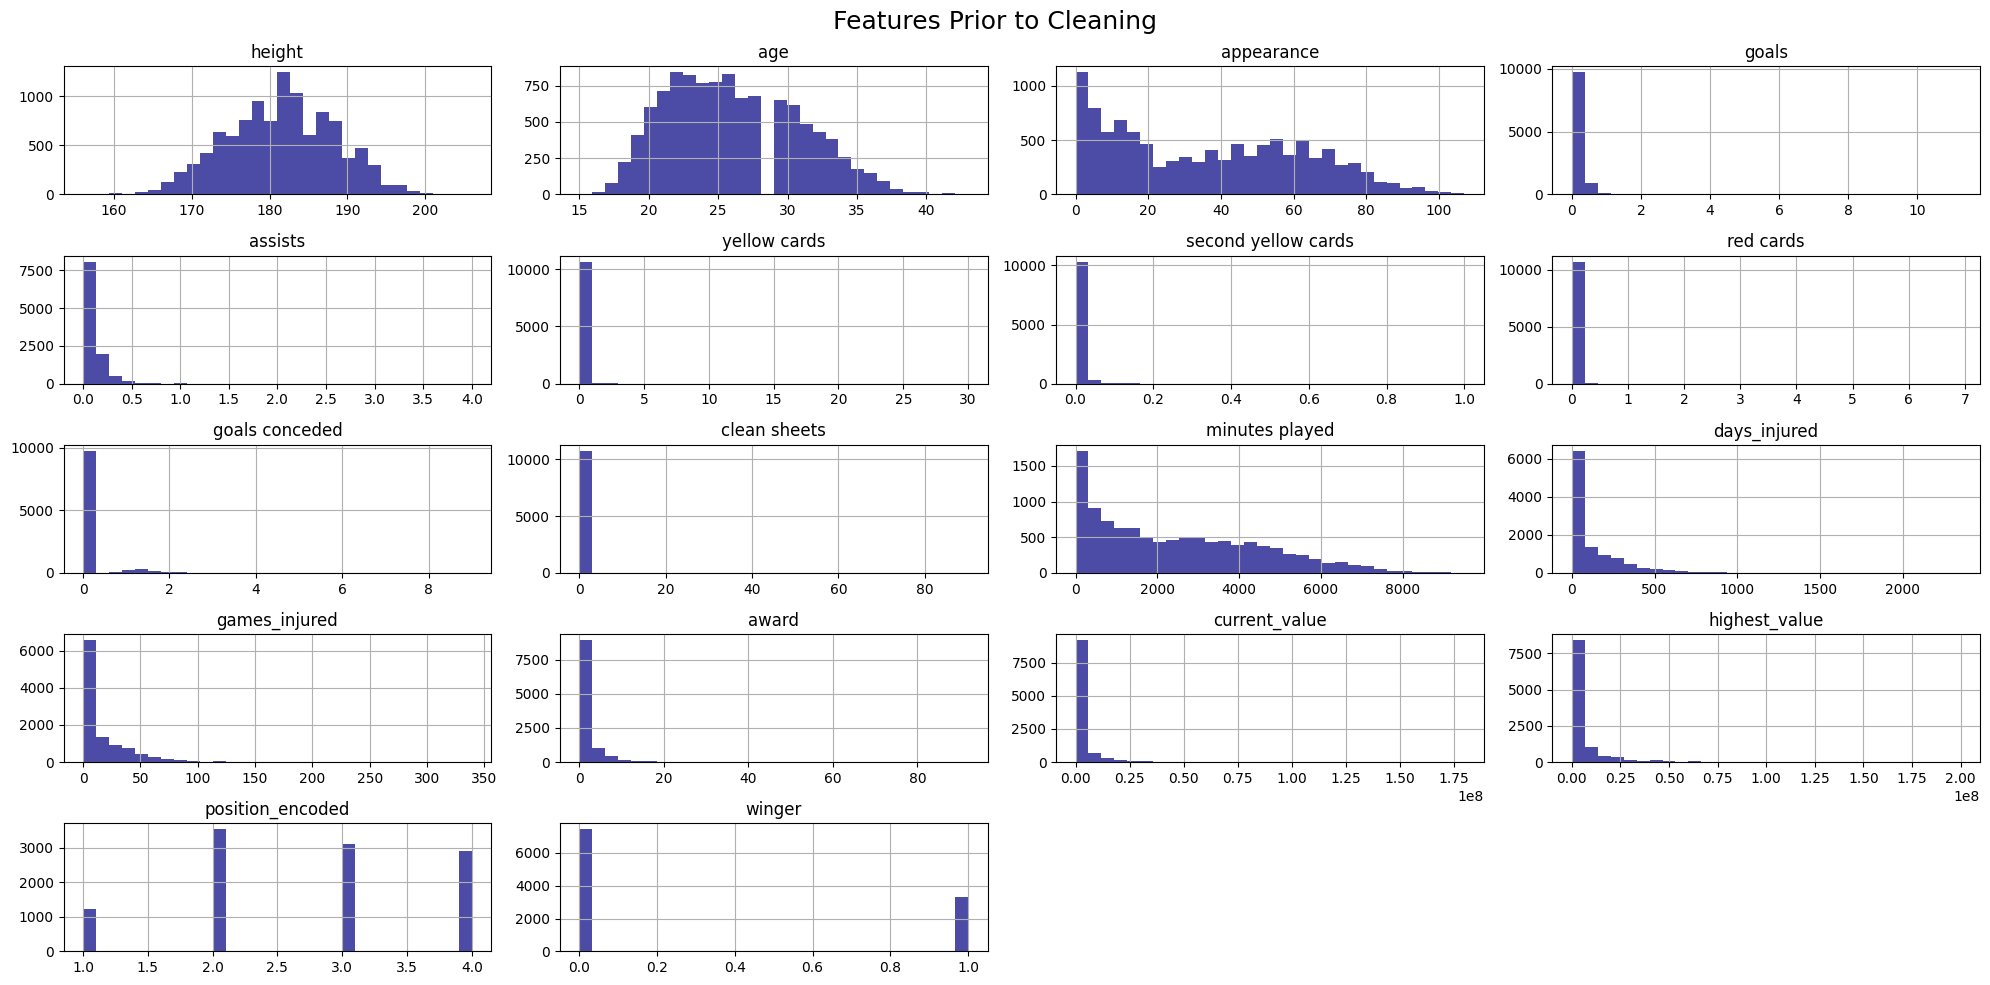

In [631]:
df.hist(bins=30, color='navy', alpha=0.7, figsize=(20, 10))
plt.suptitle("Features Prior to Cleaning", fontsize=18)
plt.tight_layout()
plt.show()

(array([1229.,    0.,    0.,    0.,    0.,    0., 3528.,    0.,    0.,
           0.,    0.,    0.,    0., 3095.,    0.,    0.,    0.,    0.,
           0., 2902.]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ]),
 <BarContainer object of 20 artists>)

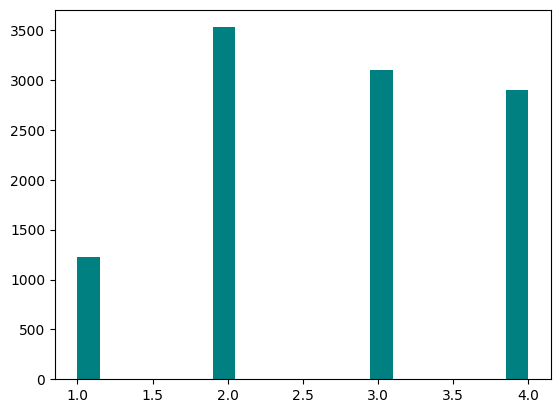

In [632]:
plt.hist(df["position_encoded"], bins=20, color='teal')

(array([9.397e+03, 9.690e+02, 2.100e+02, 1.010e+02, 3.200e+01, 1.700e+01,
        7.000e+00, 1.100e+01, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ,
        50.6, 55.2, 59.8, 64.4, 69. , 73.6, 78.2, 82.8, 87.4, 92. ]),
 <BarContainer object of 20 artists>)

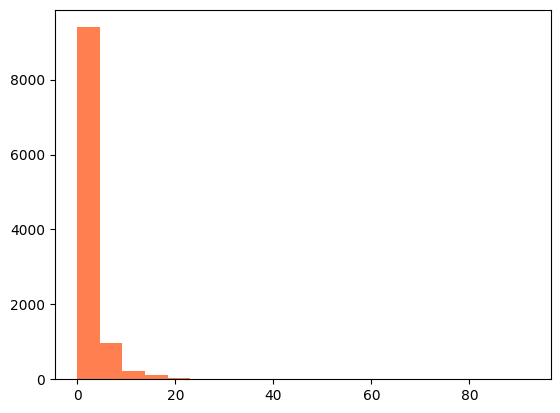

In [633]:
#df= df[df["award"] <=7]
plt.hist(df["award"], bins=20, color='coral')

(array([5191., 1203.,  901.,  624.,  431.,  388.,  326.,  269.,  293.,
         218.,  192.,  148.,  101.,   79.,   99.,   58.,   38.,   28.,
          27.,   18.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 ]),
 <BarContainer object of 20 artists>)

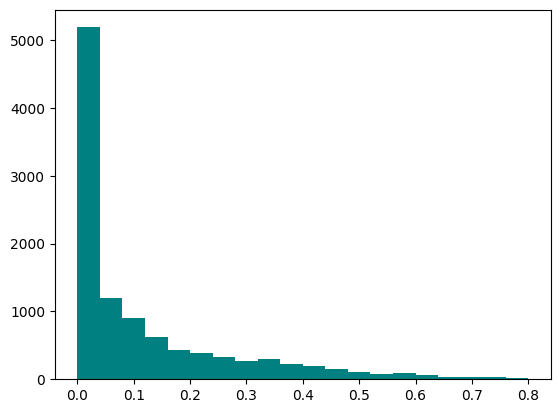

In [634]:
df = df[df["goals"] <= 0.80]
plt.hist(df["goals"], bins=20, color='teal')

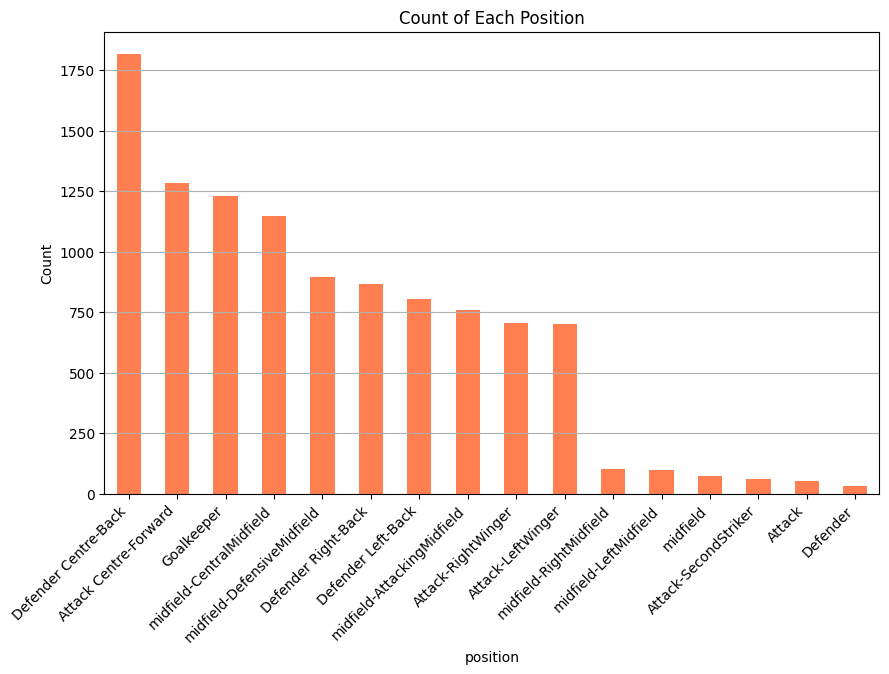

In [635]:
# Count the occurrences of each position
position_counts = df['position'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='coral')
plt.xlabel('position')
plt.ylabel('Count')
plt.title('Count of Each Position')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

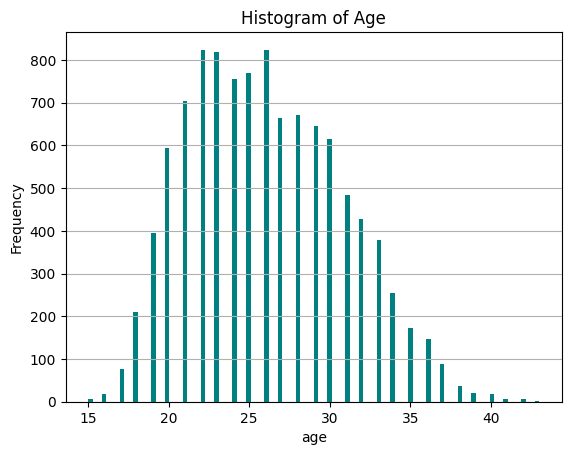

In [636]:
plt.hist(df['age'], bins=100, color='teal')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(axis='y')

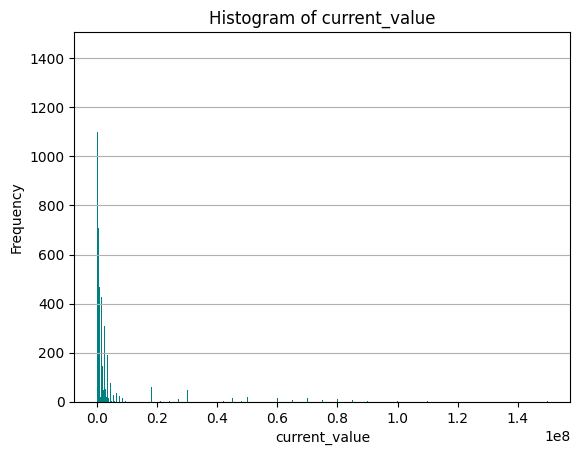

In [637]:
plt.hist(df['current_value'], bins=1000, color='teal')
plt.xlabel('current_value')
plt.ylabel('Frequency')
plt.title('Histogram of current_value')
plt.grid(axis='y')

In [639]:
df.drop(columns=["name", "player", "position_encoded", "winger","team"], inplace=True)

In [641]:
#drop whatever doesn't consider normal as a football player desription

df.drop(df[(df['age'] <= 18) | (df['age'] >= 40)].index, inplace=True)
df.drop(df[(df['current_value'] == 0) | (df['highest_value'] == 0)].index, inplace=True)
df.drop(df[(df['appearance'] == 0)].index, inplace=True)
df.drop(df[(df['height'] < 140) | (df['height'] > 195)].index, inplace=True)
df.drop(df[df['current_value'] > 80000000].index, inplace=True)
df.drop(df[df['highest_value'] > 80000000].index, inplace=True)
df.drop(df[(df['goals'] == 0.00)].index, inplace=True)

In [642]:
df.shape

(6011, 17)

In [650]:
df["award"].value_counts(ascending=False)

,count
award,
0,2254
1,1329
2,777
3,473
4,279
5,220
6,137
7,128


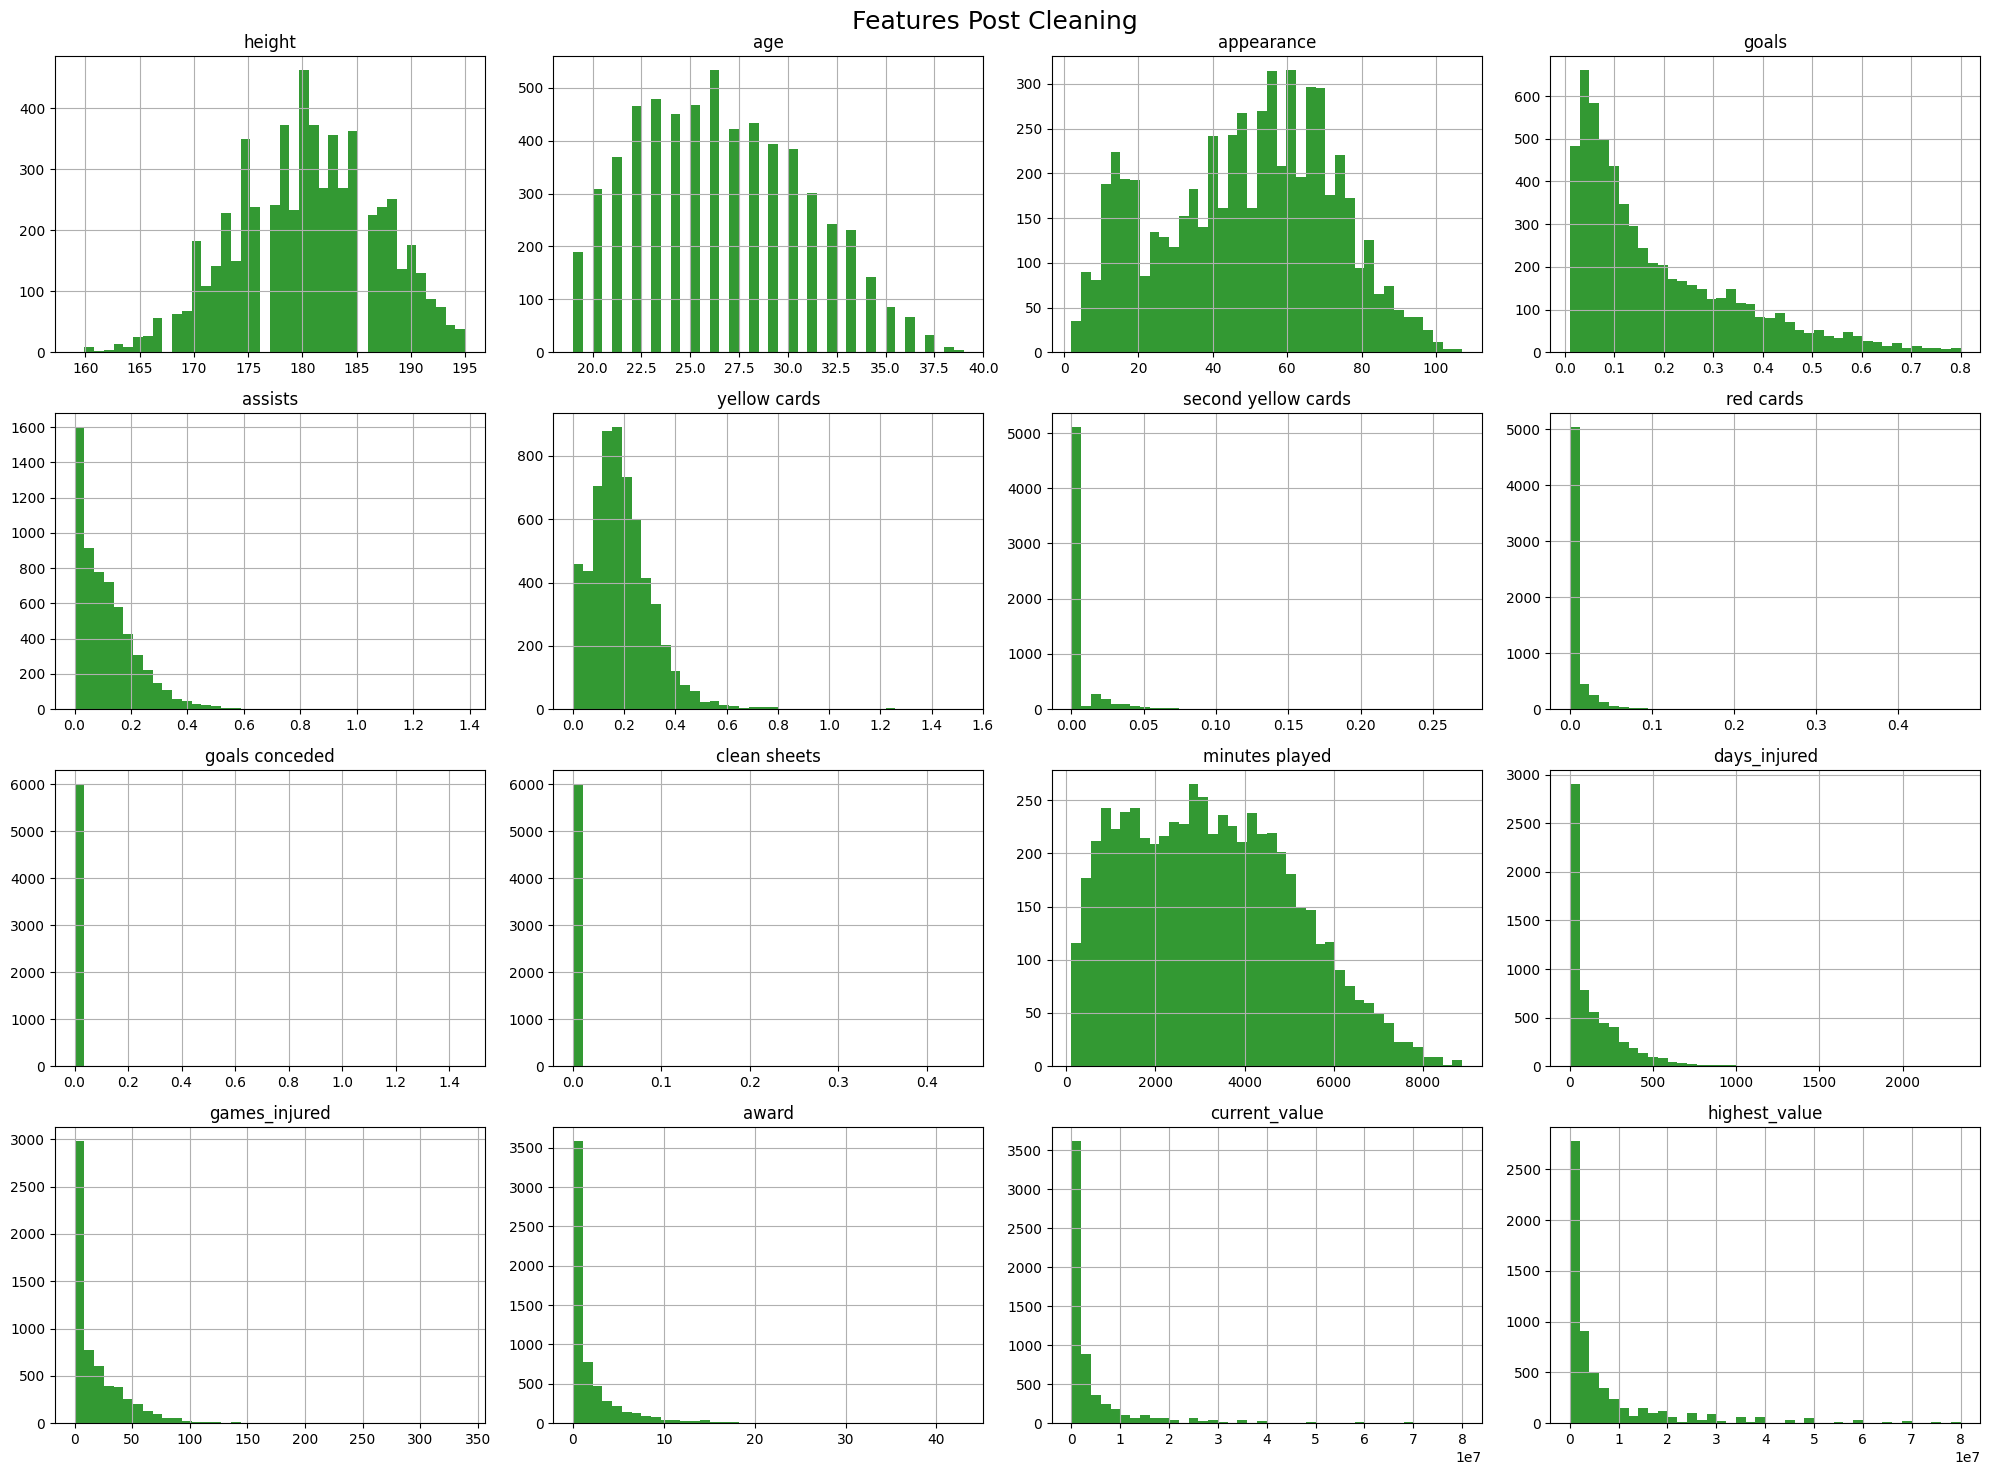

In [644]:
df.hist(bins=40, color='green', alpha=0.8, figsize=(20, 15))
plt.suptitle("Features Post Cleaning", fontsize=18)
plt.tight_layout()
plt.show()

(array([2254.,    0., 1329.,    0.,    0.,  777.,    0.,    0.,  473.,
           0.,    0.,  279.,    0.,    0.,  220.,    0.,    0.,  137.,
           0.,  128.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

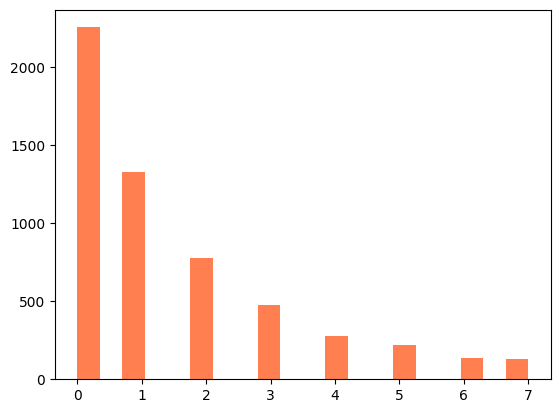

In [647]:
df = df[df["award"] <= 7]
plt.hist(df["award"], bins=20, color='coral')

In [316]:
df.shape

(3007, 17)

(array([1049., 1019.,  736.,  493.,  399.,  324.,  285.,  237.,  251.,
         183.,  162.,  103.,   88.,   66.,   73.,   42.,   30.,   23.,
          20.,   14.]),
 array([0.01071046, 0.05017494, 0.08963941, 0.12910389, 0.16856837,
        0.20803285, 0.24749732, 0.2869618 , 0.32642628, 0.36589075,
        0.40535523, 0.44481971, 0.48428418, 0.52374866, 0.56321314,
        0.60267762, 0.64214209, 0.68160657, 0.72107105, 0.76053552,
        0.8       ]),
 <BarContainer object of 20 artists>)

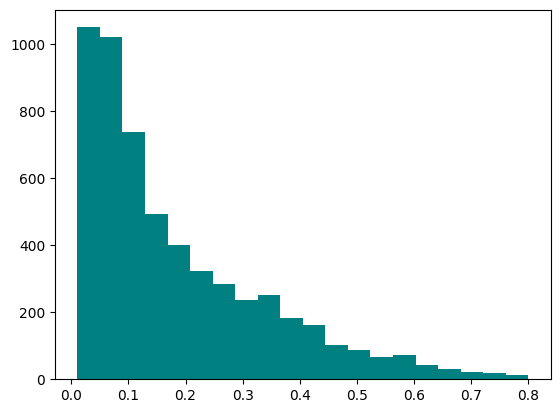

In [651]:
df = df[df["goals"] <= 0.80]
plt.hist(df["goals"], bins=20, color='teal')

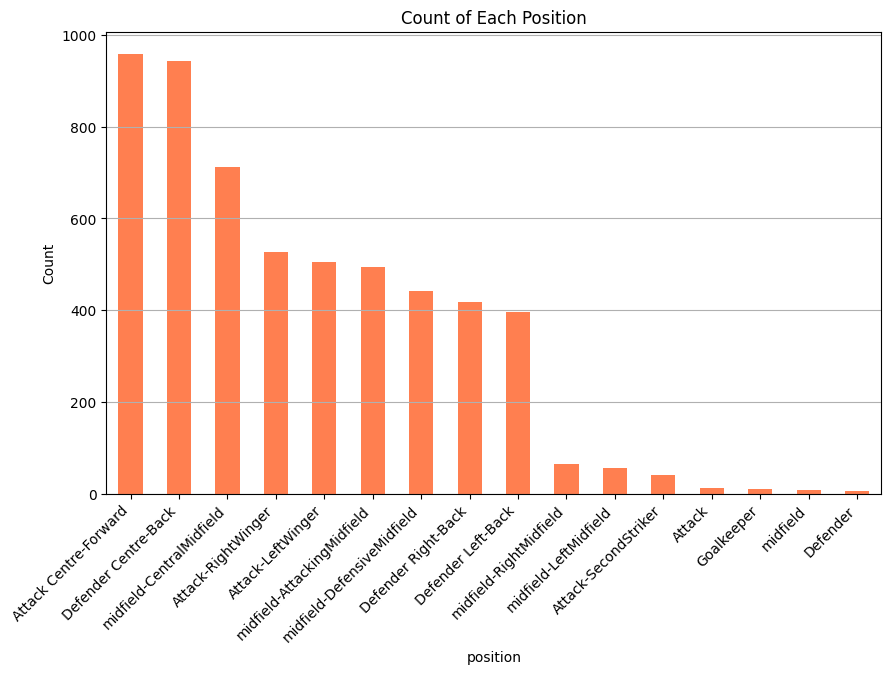

In [652]:
# Count the occurrences of each position
position_counts = df['position'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='coral')
plt.xlabel('position')
plt.ylabel('Count')
plt.title('Count of Each Position')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

In [653]:
least_frequent_positions = df['position'].value_counts().nsmallest(7).index
df['position'] = df['position'].apply(lambda x: 'Other' if x in least_frequent_positions else x)

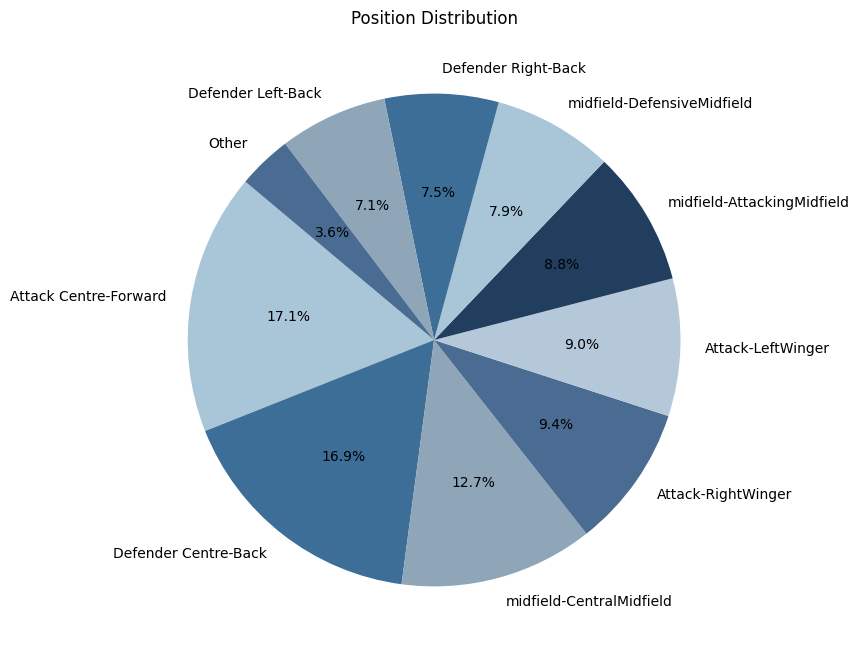

In [654]:
position_counts = df['position'].value_counts()

light_navy_shades = [
    '#A9C6D9',
    '#3C6E98',
    '#8FA5B8',
    '#4A6C92',
    '#B4C8D9',
    '#223E5E'
]
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140,
        colors=light_navy_shades)

plt.title('Position Distribution')

plt.show()

**B. Feature engineering**


1.Feature scaling            
2.Aggregation                        
3.One hot coding


In [655]:
categorical_features = ['position']
numeric_features = ['age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

In [656]:
for i in categorical_features:
    print (df[i].value_counts())

position
Attack Centre-Forward         959
Defender Centre-Back          944
midfield-CentralMidfield      712
Attack-RightWinger            526
Attack-LeftWinger             505
midfield-AttackingMidfield    495
midfield-DefensiveMidfield    442
Defender Right-Back           418
Defender Left-Back            397
Other                         199
Name: count, dtype: int64


In [657]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [658]:
df.shape

(5597, 26)

In [659]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Other,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield
5,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
9,178.0,27.0,74,0.015374,0.169115,0.353604,0.0000,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


 **C. Feature selection**

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

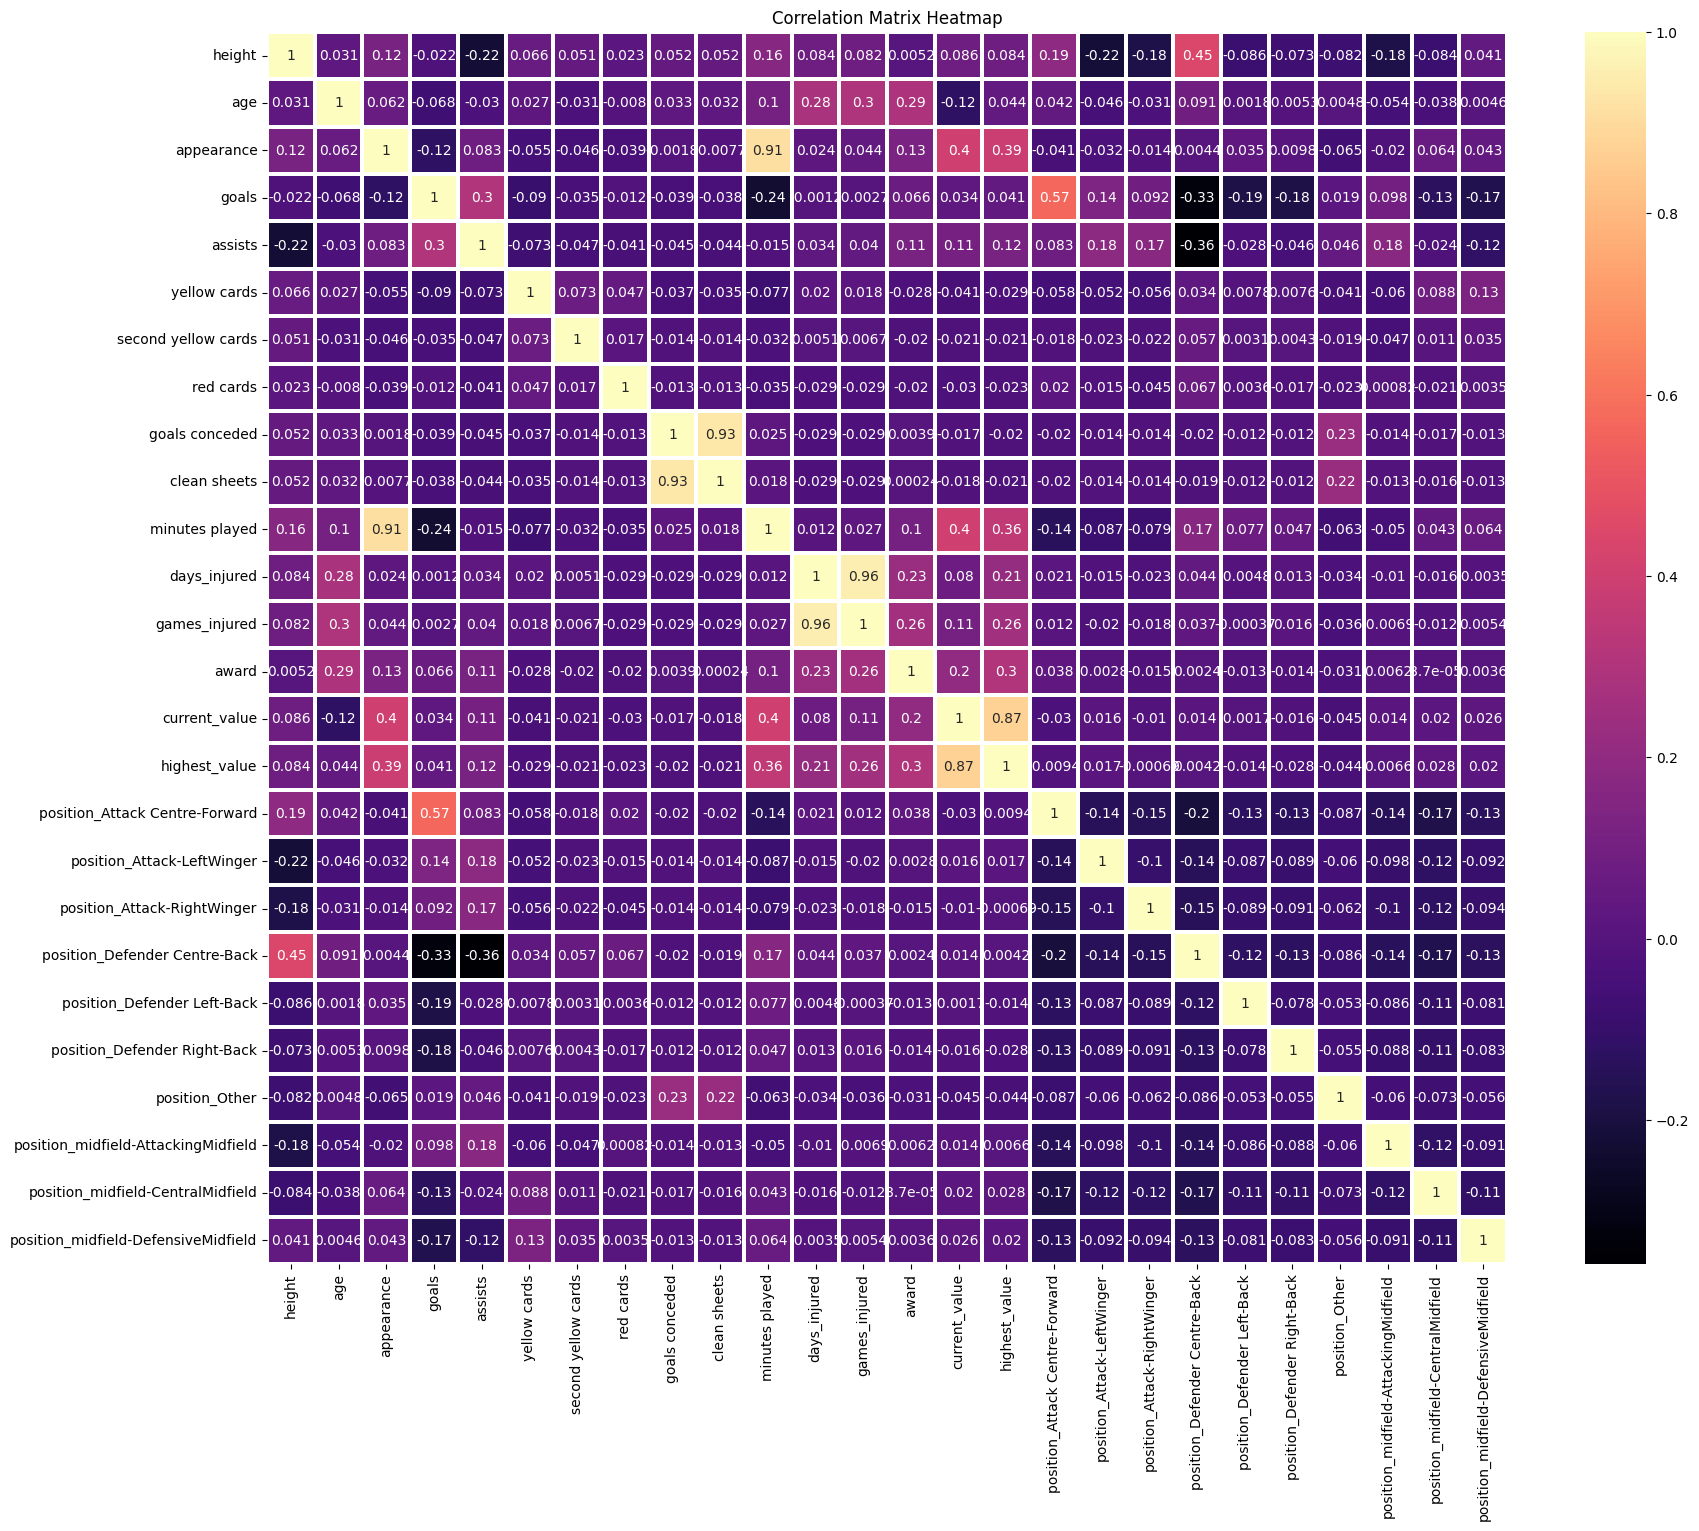

In [660]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=1.5)
plt.title("Correlation Matrix Heatmap")

In [661]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value                          1.000000
highest_value                          0.869993
appearance                             0.403979
minutes played                         0.403250
award                                  0.203755
assists                                0.113124
games_injured                          0.105866
height                                 0.085931
days_injured                           0.079711
goals                                  0.033592
position_midfield-DefensiveMidfield    0.025802
position_midfield-CentralMidfield      0.019526
position_Attack-LeftWinger             0.015928
position_midfield-AttackingMidfield    0.014444
position_Defender Centre-Back          0.013967
position_Defender Left-Back           -0.001703
position_Attack-RightWinger           -0.010033
position_Defender Right-Back          -0.016300
goals conceded                        -0.016839
clean sheets                          -0.017890
second yellow cards                   -0

In [665]:
# Set the correlation threshold
threshold = 0.09

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'assists', 'minutes played', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

In [666]:
selected_features = ['age', 'appearance', 'assists', 'minutes played', 'games_injured',
       'award', 'current_value', 'highest_value']

In [667]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'position_Attack Centre-Forward',
       'position_Attack-LeftWinger', 'position_Attack-RightWinger',
       'position_Defender Centre-Back', 'position_Defender Left-Back',
       'position_Defender Right-Back', 'position_Other',
       'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield'],
      dtype='object')

In [668]:
df = df[selected_features]
df.head()

,age,appearance,assists,minutes played,games_injured,award,current_value,highest_value
5,30.0,68,0.000000,4762,27,1,25000000,70000000
9,27.0,74,0.169115,5854,70,4,35000000,42000000
10,23.0,89,0.063096,7132,15,3,22000000,22000000
12,24.0,72,0.048439,5574,49,3,35000000,35000000
15,26.0,76,0.038404,4687,53,2,25000000,35000000


## Data should be prepared.

In [670]:
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [671]:
X.shape

(5597, 7)

## Buliding the Model

In [672]:
model = LinearRegression()

In [673]:
ridge_model = Ridge()

In [674]:
lasso_model = Lasso()

In [675]:
param_grid = {
    'alpha': [0.1, 1, 10, 50, 100,1000]
}


grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error',
                           verbose=1)


grid_search_ridge = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error',
                           verbose=1)

## Train the Model

In [676]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [677]:
# Fit GridSearchCV on the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)# Fit GridSearchCV on the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters and best model

# Ridge
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

# Lasso
best_params_lasso = grid_search_lasso.best_params_
best_model_lasso = grid_search_lasso.best_estimator_

print("Best Parameters for ridge model:", best_params_ridge)
print("Best Parameters for lasso model:", best_params_lasso)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters for ridge model: {'alpha': 1}
Best Parameters for lasso model: {'alpha': 1000}
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Parameters for ridge model: {'alpha': 1}
Best Parameters for lasso model: {'alpha': 1000}


### Test the Model

In [678]:
# Predict and evaluate the model

y_pred = model.predict(X_test_scaled) # Linear regression model
y_pred_ridge = best_model_ridge.predict(X_test_scaled) # Ridge model
y_pred_lasso = best_model_lasso.predict(X_test_scaled) # Lasso model

## Interpretation of the Model

In [679]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) # Linear model cofficients
coeff_df_ridge = pd.DataFrame(best_model_ridge.coef_,X.columns,columns=['Coefficient']) # Ridge model cofficients
coeff_df_lasso = pd.DataFrame(best_model_lasso.coef_,X.columns,columns=['Coefficient']) # Lasso model cofficients

In [680]:
coeff_df

,Coefficient
age,-1.222291e+06
appearance,-1.134938e+06
assists,2.268757e+05
minutes played,1.914782e+06
games_injured,-5.183009e+05
award,2.064470e+04
highest_value,6.731908e+06


In [681]:
coeff_df_ridge

,Coefficient
age,-1.221996e+06
appearance,-1.130129e+06
assists,2.265686e+05
minutes played,1.910655e+06
games_injured,-5.179458e+05
award,2.094006e+04
highest_value,6.729851e+06


In [682]:
coeff_df_lasso

,Coefficient
age,-1.220596e+06
appearance,-1.121020e+06
assists,2.248704e+05
minutes played,1.901517e+06
games_injured,-5.172739e+05
award,1.908972e+04
highest_value,6.730630e+06


In [683]:
print(f" Linear regression intercept: {model.intercept_}")
print(f" Ridge model intercept: {best_model_ridge.intercept_}")
print(f" Lasso model intercept: {best_model_lasso.intercept_}")

 Linear regression intercept: 4243678.802769713
 Ridge model intercept: 4243678.802769713
 Lasso model intercept: 4243678.802769713


## Evaluating the Model

Mean Square Error

In [684]:
y_base = [y_train.mean()] * len(y_test)

In [685]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 74238818427202.81


In [686]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

# MSE for Ridge model
mse_train_ridge = mean_squared_error(y_train, best_model_ridge.predict(X_train_scaled))
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for training ridge model: {mse_train_ridge}')
print(f'Mean Squared Error for testing ridge model: {mse_test_ridge}')

# MSE Lasso model
mse_train_lasso = mean_squared_error(y_train, best_model_lasso.predict(X_train_scaled))
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for training lasso model: {mse_train_lasso}')
print(f'Mean Squared Error for testing lasso model: {mse_test_lasso}')

Mean Squared Error for training: 11803438652896.203
Mean Squared Error for testing: 15697150925200.072
Mean Squared Error for training ridge model: 11803444856298.475
Mean Squared Error for testing ridge model: 15697190118947.158
Mean Squared Error for training lasso model: 11803473773074.617
Mean Squared Error for testing lasso model: 15697377081916.795


Mean Absolute Error

In [687]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base}')

Mean Absolute  Error of base model: 4723757.518587065


In [688]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

# MSE for Ridge model
mae_train_ridge = mean_absolute_error(y_train, best_model_ridge.predict(X_train_scaled))
mae_test_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error for training ridge model: {mae_train_ridge}')
print(f'Mean Absolute Error for testing ridge model: {mae_test_ridge}')

# Lasso model
mae_train_lasso = mean_absolute_error(y_train, best_model_lasso.predict(X_train_scaled))
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Mean Absolute Error for training lasso model: {mae_train_lasso}')
print(f'Mean Absolute Error for testing lasso model: {mae_test_lasso}')

Mean Absolute Error for training: 1978896.228130127
Mean Absolute Error for testing: 2147796.8053794876
Mean Absolute Error for training ridge model: 1978686.8414204742
Mean Absolute Error for testing ridge model: 2147515.84146303
Mean Absolute Error for training lasso model: 1977944.9309605015
Mean Absolute Error for testing lasso model: 2146762.777215899


Root Mean Squared Error

In [689]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 8616195.124717338


In [690]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

# RMSE for Ridge model

print(f'Root Mean Squared Error for training ridge model: {np.sqrt(mse_train_ridge)}')
print(f'Root Mean Squared Error for testing ridge model: {np.sqrt(mse_test_ridge)}')

# RMSE Lasso model

print(f'Root Mean Squared Error for training lasso model: {np.sqrt(mse_train_lasso)}')
print(f'Root Mean Squared Error for testing lasso model: {np.sqrt(mse_test_lasso)}')

Root Mean Squared Error for training: 3435613.286284736
Root Mean Squared Error for testing: 3961963.014113089
Root Mean Squared Error for training ridge model: 3435614.1890931926
Root Mean Squared Error for testing ridge model: 3961967.960363531
Root Mean Squared Error for training lasso model: 3435618.397475863
Root Mean Squared Error for testing lasso model: 3961991.555003215


R Square

In [691]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

# Ridge model r2 score
r2_score_train_ridge = r2_score(y_train, best_model_ridge.predict(X_train_scaled))
r2_score_test_ridge = r2_score(y_test, y_pred_ridge)
print(f'R Square for training ridge model: {r2_score_train_ridge}')
print(f'R Square for testing ridge model: {r2_score_test_ridge}')

# Lasso model r2 score
r2_score_train_lasso = r2_score(y_train, best_model_lasso.predict(X_train_scaled))
r2_score_test_lasso = r2_score(y_test, y_pred_lasso)
print(f'R Square for training lasso model: {r2_score_train_lasso}')
print(f'R Square for testing lasso model: {r2_score_test_lasso}')

R Square for training: 0.807882574389422
R Square for testing: 0.7885000090665968
R Square for training ridge model: 0.8078824734203985
R Square for testing ridge model: 0.7884994809785895
R Square for training lasso model: 0.8078820027595384
R Square for testing lasso model: 0.7884969618802784


# **Predictions vs. Real Values**

In [692]:
predictions = model.predict(X_test_scaled)

In [693]:
#predictions
Real_Values = np.array(y_test)

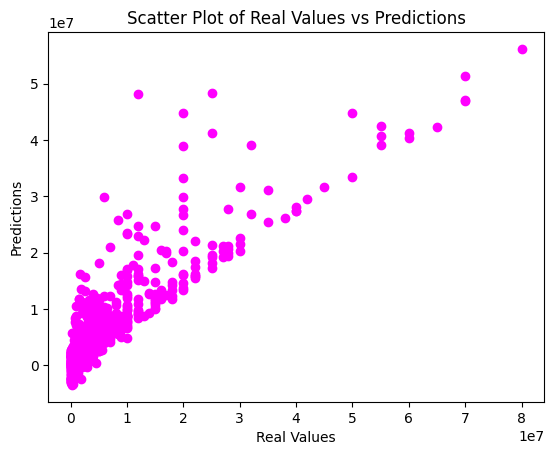

In [694]:
#Real_Values
plt.scatter(Real_Values, predictions, color='magenta')
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Scatter Plot of Real Values vs Predictions")
plt.show()

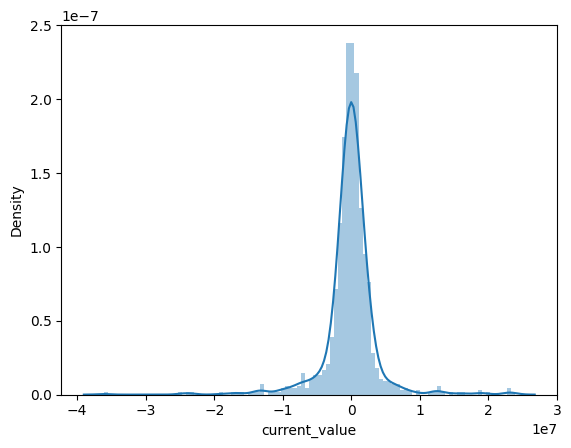

In [695]:
sns.distplot((y_test-predictions),bins=100); # it's good if we get normal distribution